In [6]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import time
plt.style.use('seaborn-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 2: EGM

Consider the model
$$\begin{align*}
V_{t}(M_{t}) & = & \max_{C_{t}}\left\{ \frac{C_{t}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{t}\left[V_{t+1}(M_{t+1})\right]\right\} \\
 & \text{s.t.}\\
M_{t+1} & = & R(M_{t}-C_{t})+Y_{t+1}\\
Y_{t+1} & = & \exp(\xi_{t+1})\\
\xi_{t+1} & = & \mathcal{N}(0,\sigma_{\xi}^{2})\\
A_{t}=M_{t}-C_{t} & \geq & 0
\end{align*}$$

for $T=10$, $\beta=0.98$, $\rho=0.5$, $R=1.0/\beta$, $M_1=10$ and $\sigma_{\xi}=0.2$.

### 1. Solve the model using EGM. Remember that optimal consumption must satisfy the Euler-equation:
$$\begin{align*}
u'(C_t) = \mathbb{E}_t[u'(C_{t+1}^{\star}(M_{t+1}))]
\end{align*}$$

In [11]:
# load modules related to this exercise
import Exercise_1 as ex1
import Exercise_2 as ex2


In [12]:
# Setup
t1 = time.time()
par_TI = ex1.setup()
# Solve
sol_TI = ex1.solve_ti(par_TI)
t2 = time.time()
print("Time spent on vectorized time iterations:", t2 - t1)


# Setup
t1 = time.time()
par_EGM = ex2.setup()
# Solve
sol_EGM = ex2.solve_EGM(par_EGM, vector=False)
t2 = time.time()
print("Time spent on EGM with loop:", t2 - t1)



Time spent on vectorized time iterations: 0.8169212341308594
Time spent on EGM with loop: 0.07301616668701172


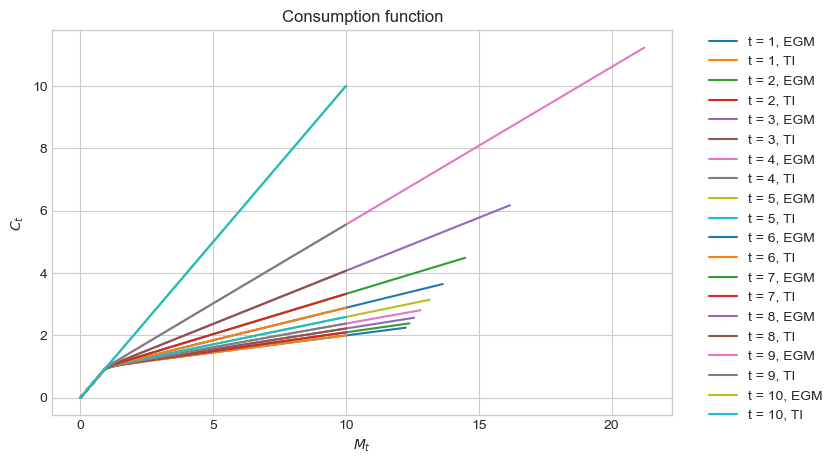

In [13]:
# Print consumption function

fig = plt.figure(figsize=(8,5))# figsize is in inches...
ax = fig.add_subplot(1,1,1)
for t in range(par_EGM.T):
    ax.plot(sol_EGM.M[:,t],sol_EGM.C[:,t], label=f"t = {t + 1}, EGM")
    ax.plot(par_TI.grid_M,sol_TI.C[:,t], label=f"t = {t + 1}, TI")
ax.set_xlabel(f"$M_t$")
ax.set_ylabel(f"$C_t$")
ax.set_title(f'Consumption function')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### 2. Simulate a panel of *N=10000* household for *T=10* periods and plot the mean of $C_t$. Everybody should be initialized with $W_t = 1.5$.

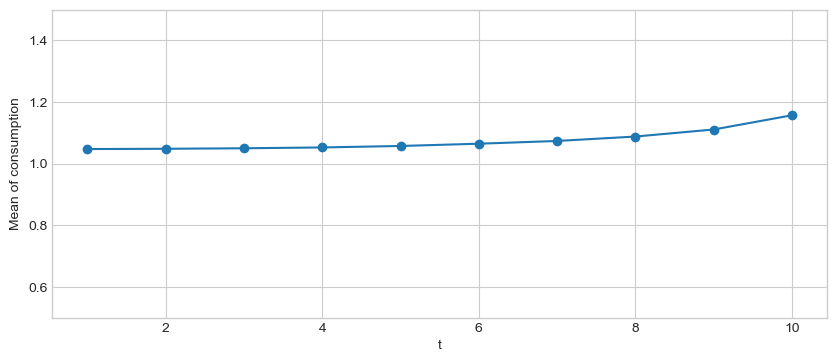

In [14]:
sim = ex2.simulate(par_EGM,sol_EGM)

def figure_sim(simC,par):
    fig = plt.figure(figsize=(10,4))# figsize is in inches...
    t_grid = [t for t in range(1,par.T+1)]    
    ax = fig.add_subplot(1,1,1)
    ax.plot(t_grid,np.mean(sim.C,0),'-o')
    ax.set_xlabel(f"t")
    ax.set_ylabel(f"Mean of consumption")
    ax.set_ylim(bottom=0.5,top=1.5)
    plt.show()
    
figure_sim(sim.C,par_EGM)

### 3. (Optional) Could you write a vectorized version of EGM to speed it up? (i.e. without no loop over $a_t$)

In [15]:
# Setup
t1 = time.time()
par_TI = ex1.setup()
# Solve
sol_TI = ex1.solve_ti(par_TI)
t2 = time.time()
print("Time spent on vectorized time iterations:", t2 - t1)


# Setup
t1 = time.time()
par_EGM = ex2.setup()
# Solve
sol_EGM = ex2.solve_EGM(par_EGM, vector=False)
t2 = time.time()
print("Time spent on EGM with loop:", t2 - t1)

# Setup
t1 = time.time()
par_EGM = ex2.setup()
# Solve
sol_EGM = ex2.solve_EGM(par_EGM, vector=True)
t2 = time.time()
print("Time spent on vectorized EGM:", t2 - t1)

Time spent on vectorized time iterations: 0.8131871223449707
Time spent on EGM with loop: 0.07202410697937012
Time spent on vectorized EGM: 0.0030007362365722656
